### Add package to Python path

In [1]:
import sys
sys.path.append('/home/guilherme/Projects/ST7/propagation-code-optimization/') # change this

### Get data from logs

In [2]:
import numpy as np

f = open('data/log_hyperp.log', 'r')

lambdas = []
t0s = []
costs = []

i=0

## For SA
for line in f.readlines():
    firstword = line.split(' ')[0]
    lastword = line.split(' ')[-1]
    if lastword == 'Recommendation:\n':
        break
    if i==1:
        lambdas.append(float(lastword))
    elif i==2:
        t0s.append(float(lastword))
    elif i==4:
        costs.append(float(firstword))
    i = (i+1)%5
    
## For CSA
# for line in f.readlines():
#     firstword = line.split(' ')[0]
#     lastword = line.split(' ')[-1]
#     if lastword == 'Recommendation:\n':
#         break
#     if i==1:
#         lambdas.append(float(lastword))
#     elif i==3:
#         t0s.append(float(lastword))
#     elif i==5:
#         costs.append(float(firstword))
#     i = (i+1)%6

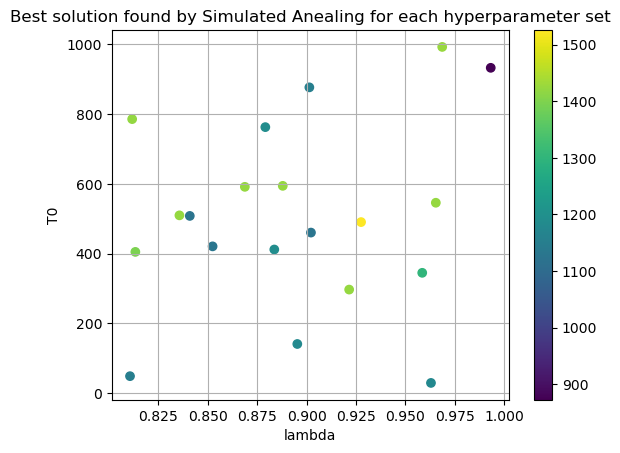

In [3]:
import matplotlib.pyplot as plt
plt.scatter(lambdas,t0s,c=costs)
plt.colorbar()
plt.grid()
plt.title("Best solution found by Simulated Anealing for each hyperparameter set")
plt.ylabel("T0")
plt.xlabel("lambda")

In [4]:
features = np.vstack([lambdas,t0s]).T

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern
from scipy.interpolate import NearestNDInterpolator

#gpr = GaussianProcessRegressor().fit(features, costs)
gpr = NearestNDInterpolator(features,costs,rescale=True)

In [6]:
x = np.linspace(0.8,1,num=1000)
y = np.linspace(1,1000,num=1000)
xx, yy = np.meshgrid(x,y,indexing='xy')
plotx = np.vstack([xx.flatten(),yy.flatten()]).T
#ploty = gpr.predict(plotx)
ploty = gpr(plotx)

Text(0.5, 0, 'lambda')

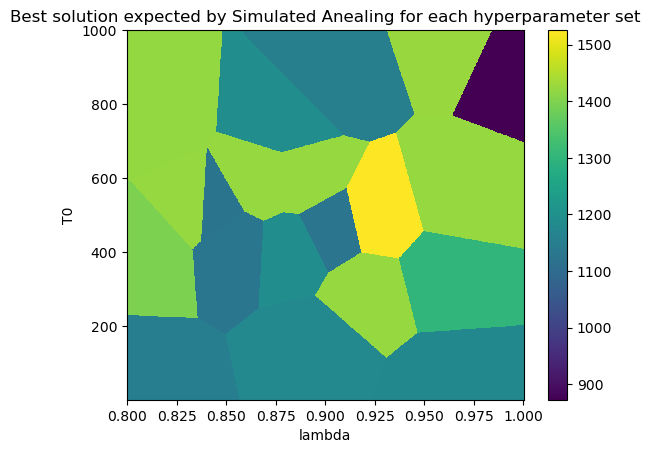

In [7]:
plt.pcolormesh(xx, yy, ploty.reshape(1000,1000))
plt.colorbar()
#plt.grid()
plt.title("Best solution expected by Simulated Anealing for each hyperparameter set")
plt.ylabel("T0")
plt.xlabel("lambda")